In [3]:
import os
path = 'datasets/dataset1_reaching-task'
fname = os.path.join(path, 'Dataset1.mat')

In [4]:
from scipy.io import loadmat
DATA = loadmat(fname)

In [5]:
print(DATA.keys())

dict_keys(['__header__', '__version__', '__globals__', 'direction', 'R'])


In [6]:
DATA['R'].shape

(143, 158)

In [7]:
DATA['direction'].shape

(158, 1)

In [8]:
import numpy as np
fr =  DATA['R'].transpose()
fr.shape

(158, 143)

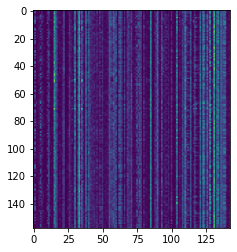

In [9]:
import matplotlib.pyplot as plt

plt.imshow(fr)

In [10]:
print(fr[:,0].mean())

2.134306240595194


In [13]:
mean = np.zeros(8)
for i in range(1,9):
    mean[i-1] = fr[(DATA['direction'][:,0]== i)[:]== True,1].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

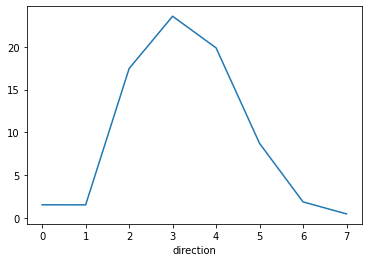

In [14]:
plt.plot(mean)
plt.xlabel('direction')
plt.show

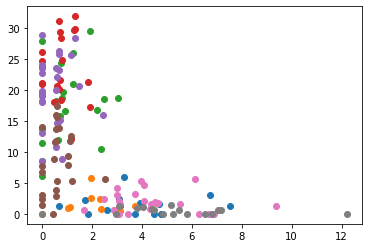

In [133]:
#2
for i in range(1,9):
    fr_1 = fr[(DATA['direction'][:,0]== i)[:]== True,0]
    fr_2 = fr[(DATA['direction'][:,0]== i)[:]== True,1]
    plt.scatter(fr_1,fr_2)

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_norm = scaler.fit_transform(fr)

pca = PCA(n_components=2)
pdata = pca.fit_transform(data_norm)

print(pca.explained_variance_)

[24.44269035  8.37567532]


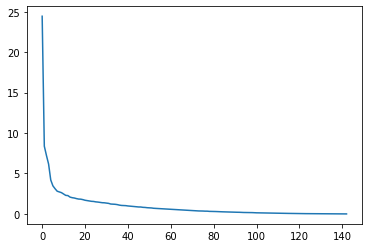

In [31]:
scaler = StandardScaler()
data_norm = scaler.fit_transform(fr)

pca = PCA(n_components=143)
pdata = pca.fit_transform(data_norm)

plt.plot(pca.explained_variance_)

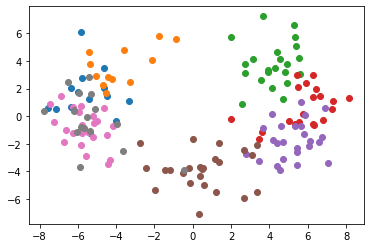

In [20]:
for i in range(1,9):
    fr_1 = pdata[(DATA['direction'][:,0]== i)[:]== True,0]
    fr_2 = pdata[(DATA['direction'][:,0]== i)[:]== True,1]
    plt.scatter(fr_1,fr_2)

In [51]:
#5
import pandas as pd
label_mapping_left = {1:0,2:0,3:1,4:2,5:2,6:2,7:1,8:0}
label_mapping_top = {1:1,2:0,3:0,4:0,5:1,6:2,7:2,8:2}

label_left = pd.DataFrame(DATA['direction'],columns=['left-middle-right'])
label_left = label_left.replace(label_mapping_left)
label_top = pd.DataFrame(DATA['direction'],columns=['top-middle-down'])
label_top = label_top.replace(label_mapping_top)
label = pd.concat([label_left,label_top], axis=1)
print(label)

     left-middle-right  top-middle-down
0                    1                0
1                    2                1
2                    2                1
3                    0                0
4                    2                2
..                 ...              ...
153                  0                0
154                  2                1
155                  1                2
156                  0                1
157                  0                2

[158 rows x 2 columns]


In [187]:
#input
input = pd.DataFrame(data_norm)
input = pd.concat([label,input], axis=1)
X = input.loc[:,0:142]
y = input.loc[:,['left-middle-right','top-middle-down']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [188]:
X_test.shape

(40, 143)

In [189]:
y_test.shape

(40, 2)

In [190]:
from sklearn.linear_model import LinearRegression

Model = LinearRegression()
fit = Model.fit(X_train,y_train)
print(Model.score(X_test, y_test))

0.48818946903828037


In [191]:
#direction_pred_left = Model.intercept_[0] + Model.coef_[0] * X_test[0]

X_test[0].shape

(40,)

In [199]:
y_pred = Model.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns=['left-middle-right','top-middle-down'])
print(y_pred)

    left-middle-right  top-middle-down
0            3.460676        -0.714737
1            2.849256         0.635640
2            1.538253         0.179267
3            2.106139         0.099878
4            0.205192        -0.086866
5            0.101543         1.071913
6           -0.261186         1.310530
7            0.193811        -0.369780
8            1.601728         1.298468
9            0.523299        -0.604826
10           0.835255         0.111848
11           1.880682         1.927792
12          -0.289738         2.725874
13           2.491601         1.473715
14           0.253462         2.513316
15           1.233834         1.862251
16           2.078160         1.151716
17           0.525383         2.153637
18           2.259066        -0.422748
19          -1.274408         0.170945
20           0.825136        -0.326063
21           1.867080         1.946878
22           1.520041         2.911211
23           1.090463        -0.365755
24           0.793328    